In [29]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings


from fractions import Fraction

from scipy import stats
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_log_error
from sklearn.model_selection import cross_val_score


from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
warnings.filterwarnings("ignore")

In [30]:
file_path = "E:/DSTI/Cours/Machine_Learning_Python_Lab/ML_Livre_JA/data_credit.txt"

In [31]:
data = pd.read_csv(file_path)

In [32]:
data

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [33]:
data.shape

(32581, 12)

In [34]:
data.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [36]:
data.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

Il est très important de comprendre les variables de notre jeu de données :
    
• person age : variable indiquant l'age de la personne ;

• person income : variable indiquant les revenus (ou encore le salaire) de la personne ;

• person home_ownership : variable indiquant le statut de la personne par rapport à son lieu d'habitation (propriétaire, locataire, etc.) ;

• person_emp_length : variable indiquant la durée (en mois) depuis laquelle la personne est en activité professionnelle ;

• loan intent : variable indiquant le motif du crédit ;

• loan grade : variable indiquant le grade du prêt ;

• loan amnt : variable indiquant le montant du prêt ;

• loan int rate : variable indiquant le taux d'intérêt du crédit ;

• loan status : c'est la variable d'intérêt. Elle indique si la personne est en défaut de paiement (1) ou pas (0) ;

• loan percent income : variable indiquant le pourcentage des revenus par rapport au crédit ;

• cb person default on file: variable indiquant si la personne ait à découvert ou pas ;

• ch person cred hist length : variable indiquant la durée des antécédents de crédits.

Passons à présent à l'analyse exploratoire des données qui nous permettra de mieux les comprendre.

# ANALYSE EXPLORATOIRE DES DONNEES

In [37]:
# Résumé statistique des données
data.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [38]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
person_age,32581.0,27.734600,6.348078,20.00,23.00,26.00,30.00,144.00
person_income,32581.0,66074.848470,61983.119168,4000.00,38500.00,55000.00,79200.00,6000000.00
person_emp_length,31686.0,4.789686,4.142630,0.00,2.00,4.00,7.00,123.00
loan_amnt,32581.0,9589.371106,6322.086646,500.00,5000.00,8000.00,12200.00,35000.00
loan_int_rate,29465.0,11.011695,3.240459,5.42,7.90,10.99,13.47,23.22
loan_status,32581.0,0.218164,0.413006,0.00,0.00,0.00,0.00,1.00
loan_percent_income,32581.0,0.170203,0.106782,0.00,0.09,0.15,0.23,0.83
cb_person_cred_hist_length,32581.0,5.804211,4.055001,2.00,3.00,4.00,8.00,30.00


In [15]:
# 25% de personnes ont l'age < à 23;
# 75% de personnes ont l'age > à 23;
# L'age moyen de personnes est 26
# L'écart d'âge entre les personnes est 6 ans 


#min : L'âge minimum dans l'échantillon. Le plus jeune âge est de 20 ans.
#25% (ou premier quartile) : 25 % des personnes ont un âge inférieur ou égal à 23 ans.
#50% (ou médiane) : 50 % des personnes ont un âge inférieur ou égal à 26 ans. C'est le point central de la distribution des âges.
#75% (ou troisième quartile) : 75 % des personnes ont un âge inférieur ou égal à 30 ans.
#max : L'âge maximum dans l'échantillon. Le plus vieil âge est de 144 ans, ce qui est une valeur anormalement élevée et pourrait être une erreur dans les données.

In [16]:
data.describe(include ="object")

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
count,32581,32581,32581,32581
unique,4,6,7,2
top,RENT,EDUCATION,A,N
freq,16446,6453,10777,26836


Nous remarquons que les moyennes et les écart-types sont très différents d'une variable à une autre. Cela indique que les données ne sont pas à la même échelle. Selon l'algorithme que nous utiliscrons, il faudra probablement normaliser les données avant de les modéliser. En effet, certains algorithmes de Machine Learning nécessent une normalisation des données pour un 
meilleur résultat.


Une manière très rapide de visualiser les distributions des variables ainsi que les nuages de points est d'utiliser la fonction pairplot de Seaborn :

In [39]:
# Distribution des variables et nuages de points
sns.pairplot
plt.show()

Nous pouvons mieux visualiser les histogrammes avec la fonction displot de Seaborn :

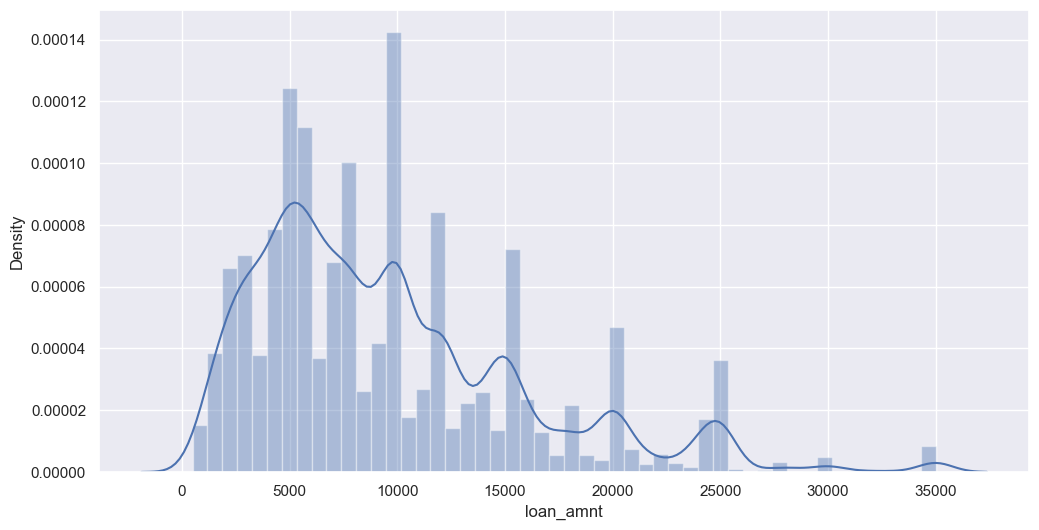

In [48]:
# Distribution de la variable •loan
sns.set(rc={"figure.figsize":(12,6)})
sns.distplot(data['loan_amnt'])
plt.show()

In [49]:
#Ce code Python sélectionne les colonnes numériques d'un DataFrame et calcule leur coefficient d'asymétrie (skewness). 
#Voici une explication détaillée de chaque ligne :
# skewness = assymétrie

numeric_data = data.select_dtypes(include=['number'])
skewness = numeric_data.skew()

In [50]:
skewness

person_age                    2.581393
person_income                -0.184689
person_emp_length             2.614455
loan_amnt                     1.192477
loan_int_rate                 0.208550
loan_status                   1.364888
loan_percent_income           1.064669
cb_person_cred_hist_length    1.661790
dtype: float64

le coefficient d'assymetrie de la variable person_income est très élévé. Pour corriger cela, faisons une transformation logarithmique de cette variable:

In [51]:
# Transformation log de la variable "person_income "
data["person_income"] = np.log(data["person_income"])

# Le coefficient d'assymetrie de la variable transformée
data["person_income"].skew()

-0.2997086059355773

Voilà qui est mieux!

Traçons le nuage de points des revenus en fonction de l'âge :

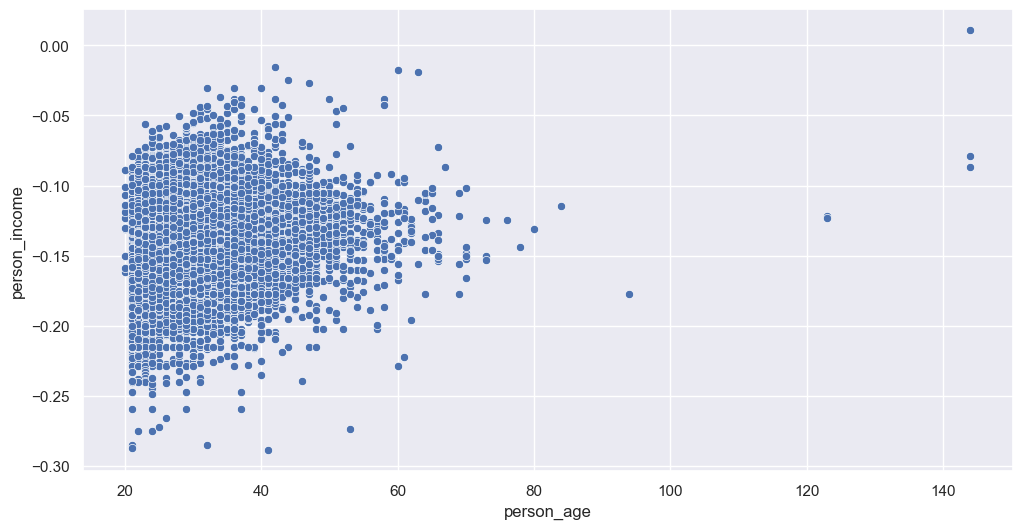

In [52]:
# Pour tracer un nuage de point 

sns.set(rc={'figure.figsize': (12, 6)})
sns.scatterplot(x = 'person_age', y = 'person_income', data = data)
plt.show()

Le graphique ci-dessus nous montre qu'il y une très faible corrélation positive entre les revenus et l'âge. Nous remarquons aussi des outliers (ce sont les valeurs 'aberrantes', c'est-à-dire des valeurs qui sortent du lot).


Analysons à présent la fréquence des modalités de chaque variable catégorielle :

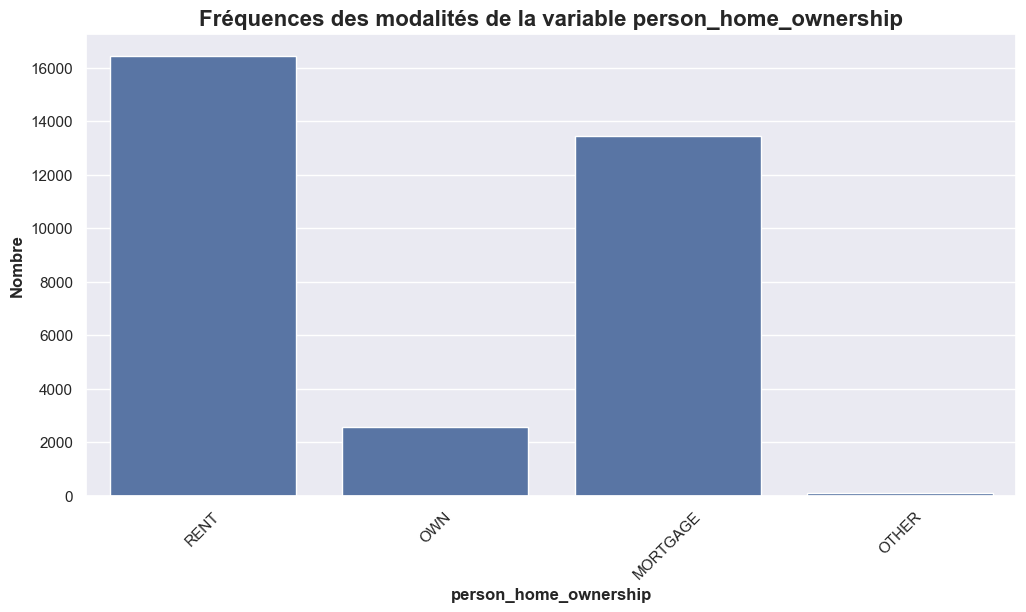

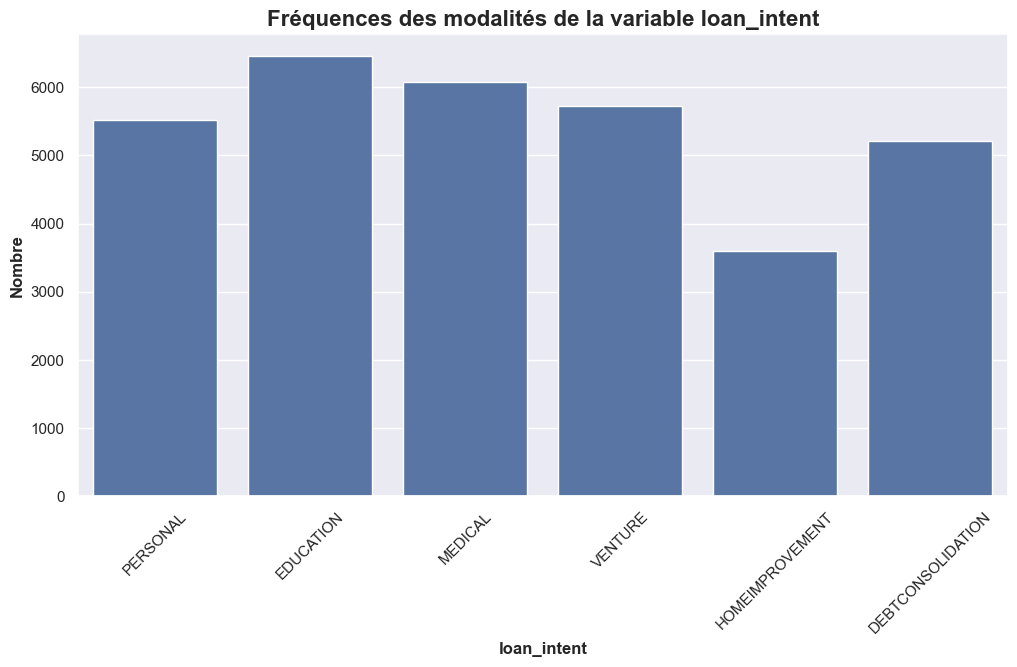

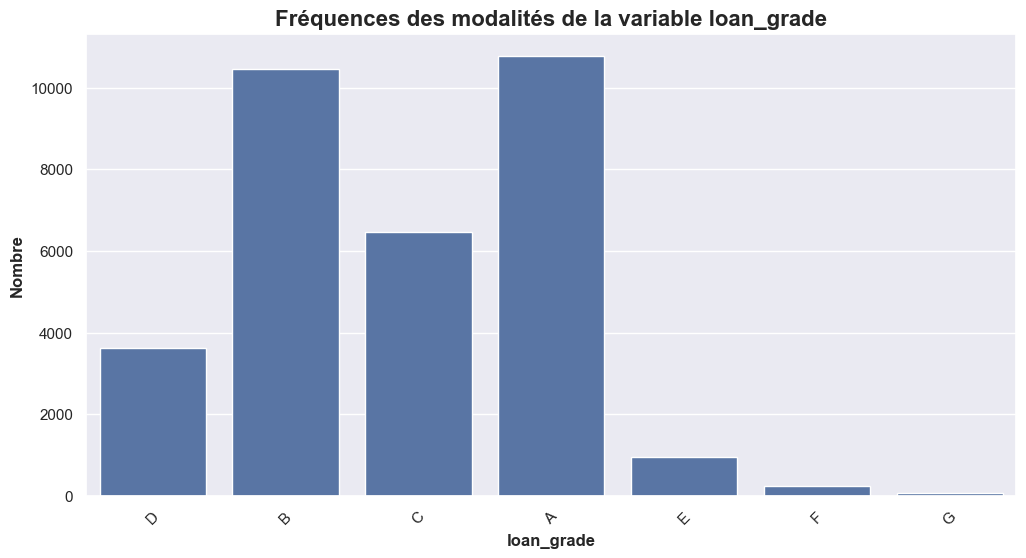

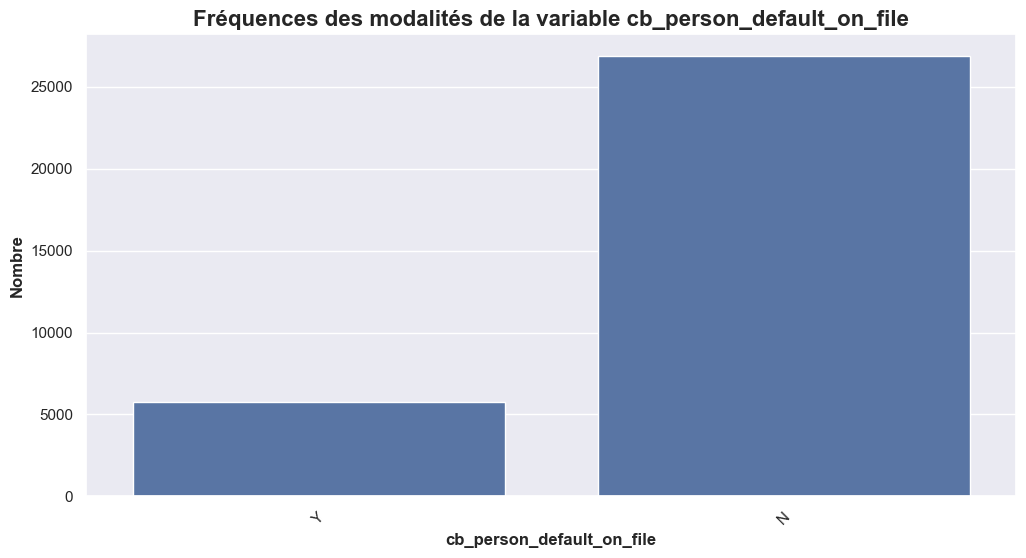

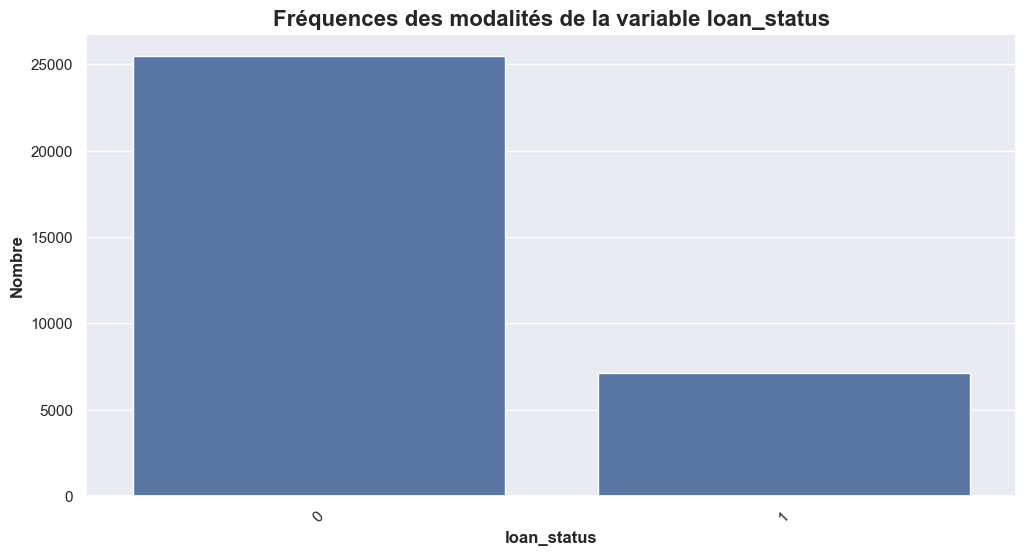

In [53]:
# Boucle sur toutes les colonnes de type "object" et la colonne "loan_status"
for col in data.select_dtypes(include=["object"]).columns.to_list() + ["loan_status"]:
    sns.countplot(x=data[col])
    plt.xlabel(col, fontweight="bold")
    plt.ylabel("Nombre", fontweight="bold")
    plt.xticks(rotation=45)
    plt.title("Fréquences des modalités de la variable " + str(col), fontsize=16, fontweight="bold")

    print("\n")
    plt.show()

In [54]:
data["loan_grade"].value_counts()

loan_grade
A    10777
B    10451
C     6458
D     3626
E      964
F      241
G       64
Name: count, dtype: int64

Nous remarquons un déséquilibre de classe au niveau de la variable d'intérêt (loan statut). Il y a beaucoup plus de personnes qui n'ont pas été en défaut de paiement que de personnes en défaut de paiement. Ce problème peut impacter la qualité de notre modèle car ce dernier pourrait avoir tendance à prédire que tous les nouveaux demandeurs de prêts ne seront pas en défaut de paiement. Ceci causerait d'énormes pertes d'argent à la banque. Il existe plusieurs méthodes pour traiter les problèmes de déséquilibre de classe. Nous utiliserons l'une de ces méthodes dans la partie prétraitement des données avant la modélisation.


Très souvent, les données financières sont souvent analysées avec des tableaux croisés dynamiques comme dans Excel. Construisons alors quelques tableaux croisés dynamiques :

In [57]:
# Tableau croisé dynamique entre le motif de prêt et le statut du prêt
# pd.crosstab c'est le tableau croisé dynamique (cross = crois/croisé)
# margins = marges

pd.crosstab(data["loan_intent"], 
           data["loan_status"],
           margins = True)

loan_status,0,1,All
loan_intent,,,
DEBTCONSOLIDATION,3722,1490,5212
EDUCATION,5342,1111,6453
HOMEIMPROVEMENT,2664,941,3605
MEDICAL,4450,1621,6071
PERSONAL,4423,1098,5521
VENTURE,4872,847,5719
All,25473,7108,32581


In [58]:
data["loan_status"].value_counts()

loan_status
0    25473
1     7108
Name: count, dtype: int64

In [59]:
data["loan_intent"].value_counts()

loan_intent
EDUCATION            6453
MEDICAL              6071
VENTURE              5719
PERSONAL             5521
DEBTCONSOLIDATION    5212
HOMEIMPROVEMENT      3605
Name: count, dtype: int64

In [63]:
data["loan_status"].unique()

array([1, 0], dtype=int64)

In [64]:
data["loan_grade"].unique()

array(['D', 'B', 'C', 'A', 'E', 'F', 'G'], dtype=object)

In [65]:
# Tableau croisé dynamique de l'accès à la propriètés groupé par le status ainsi que le grade de crédit 
pd.crosstab(data["person_home_ownership"],
           [data["loan_status"],
           data["loan_grade"]],
           margins = True)

loan_status               0                                   1              \
loan_grade                A     B     C     D    E   F  G     A     B     C   
person_home_ownership                                                         
MORTGAGE               5219  3729  1934   658  178  36  0   239   324   321   
OTHER                    23    29    11     9    2   0  0     3     5     6   
OWN                     860   770   464   264   26   7  0    66    34    31   
RENT                   3602  4222  2710   554  137  28  1   765  1338   981   
All                    9704  8750  5119  1485  343  71  1  1073  1701  1339   

loan_status                                  All  
loan_grade                D    E    F   G         
person_home_ownership                             
MORTGAGE                553  161   61  31  13444  
OTHER                    11    6    2   0    107  
OWN                      18   31    8   5   2584  
RENT                   1559  423   99  27  16446  
All                    2141  621  170  63  32581

In [85]:
table_croisee = pd.crosstab(index = [data["loan_status"],
                     data["loan_grade"]],
            columns=data["person_home_ownership"],
                     margins = True)

In [87]:
table_croisee

person_home_ownership   MORTGAGE  OTHER   OWN   RENT    All
loan_status loan_grade                                     
0           A               5219     23   860   3602   9704
            B               3729     29   770   4222   8750
            C               1934     11   464   2710   5119
            D                658      9   264    554   1485
            E                178      2    26    137    343
            F                 36      0     7     28     71
            G                  0      0     0      1      1
1           A                239      3    66    765   1073
            B                324      5    34   1338   1701
            C                321      6    31    981   1339
            D                553     11    18   1559   2141
            E                161      6    31    423    621
            F                 61      2     8     99    170
            G                 31      0     5     27     63
All                        13444    107  2584  16446  32581

In [91]:
data["person_home_ownership"].value_counts()

person_home_ownership
RENT        16446
MORTGAGE    13444
OWN          2584
OTHER         107
Name: count, dtype: int64

In [92]:
# tableau croisé dynamique du % moyen du revenu par rapport au montant du prêt groupé par les variables "person_home_ownership"
# "loan_status"
# aggfunc= "mean; calcul de moyenne pour chaque combinaison

pd.crosstab(data["person_home_ownership"],
           data["loan_status"],
           values= data["loan_percent_income"],
           aggfunc= "mean")

loan_status,0,1
person_home_ownership,,
MORTGAGE,0.146504,0.184882
OTHER,0.143784,0.300000
OWN,0.180013,0.297358
RENT,0.144611,0.264859


Par exemple, le revenu de ceux qui ont leur propre maison (donc les propriétaires) et qui sont en défaut de paiement est égal en moyenne à 29,73% du montant de leur crédit.


Quelle est la relation entre le pourcentage du revenu et le statut du crédit ?

Selon ce graphique, le pourcentage moyen de revenu (par rapport au montant du prêt) pour les personnes en défaut de paiement est plus élevé. Cela indique que ces bénéficiaires ont un ratio dette / revenu déjà trop élevé. En effet, lorsque le ratio dette / revenu est très important, cela veut dire tout simplement que le crédit est trop élevé par rapport aux revenus de la personne. Et lorsqu'on a un crédit trop élevé par rapport à ses revenus, le risque d'être en défaut de paiement est logiquement et naturellement élevé.

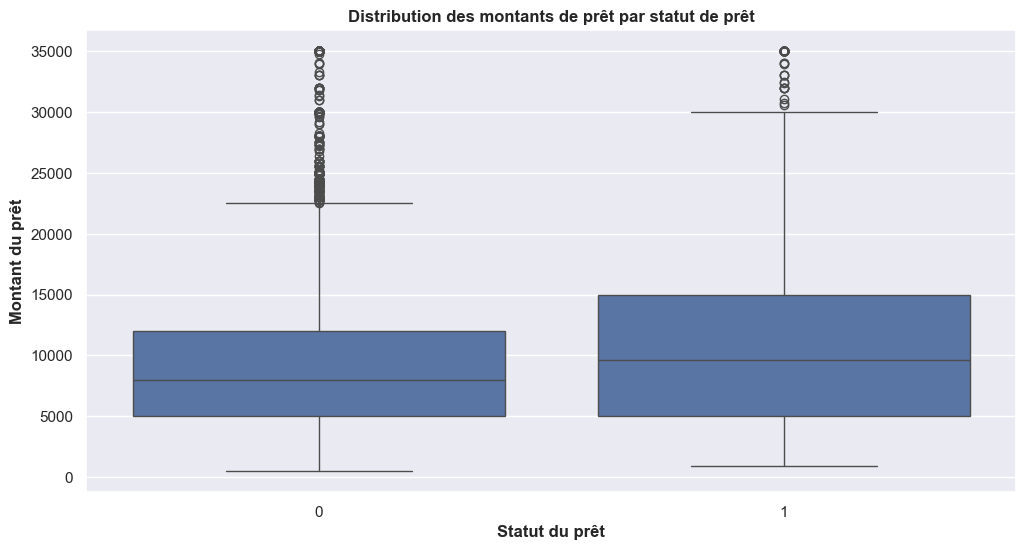

In [93]:
# Création du boxplot
sns.boxplot(x="loan_status", y="loan_amnt", data=data)

# Affichage du boxplot
plt.xlabel("Statut du prêt", fontweight="bold")
plt.ylabel("Montant du prêt", fontweight="bold")
plt.title("Distribution des montants de prêt par statut de prêt", fontweight="bold")
plt.show()

Globalement, les personnes en défaut de paiement ont un crédit supérieur à celui des personnes qui ont remboursé leurs prêts

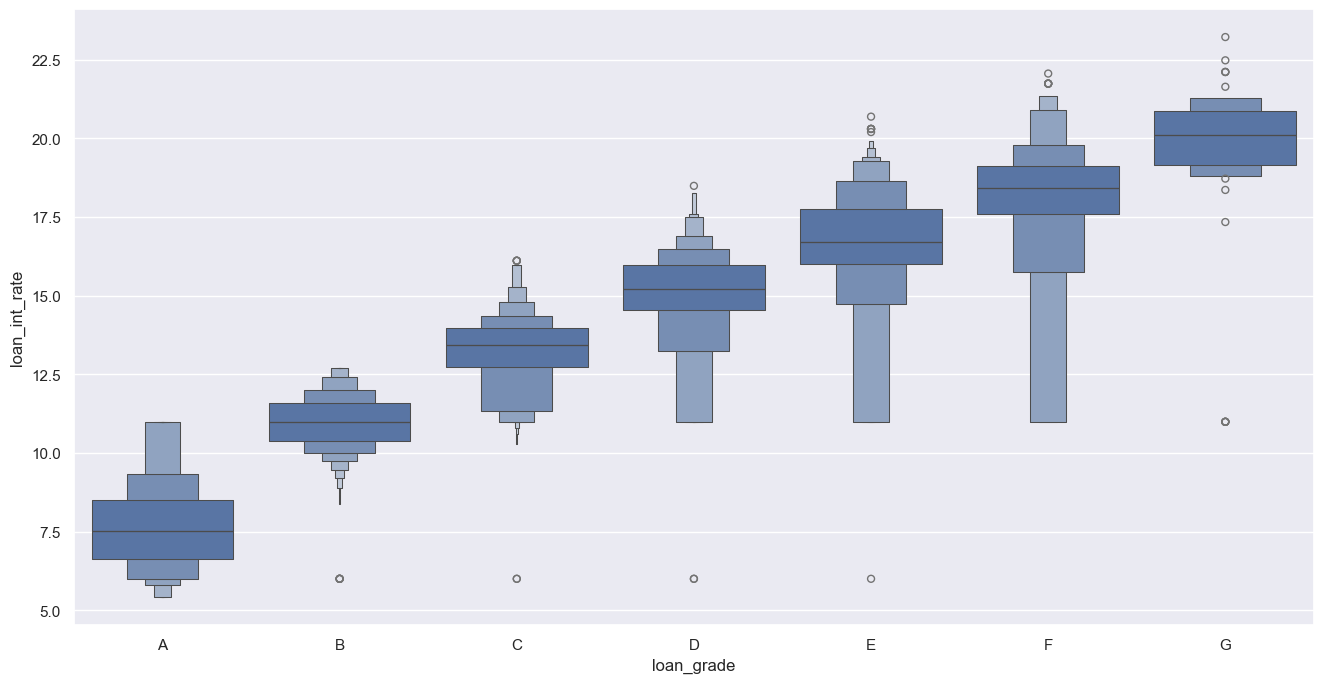

In [111]:
# loan_int_rate vs loan_grade 
crédit_grade = ["A", "B", "C", "D", "E", "F", "G"]

sns.set(rc = {"figure.figsize" : (16, 8)})

sns.boxenplot(x = "loan_grade",  
              y= "loan_int_rate", 
              data = data, 
              order =crédit_grade)
plt.show()

Plus le crédit est iumportant (grade élévé), plus le taux d'intérêt est élevé.

In [112]:
data["loan_grade"].value_counts()


loan_grade
A    10292
B     9985
C     6156
D     3445
E      921
F      226
G       62
Name: count, dtype: int64

<Axes: xlabel='loan_grade', ylabel='loan_int_rate'>

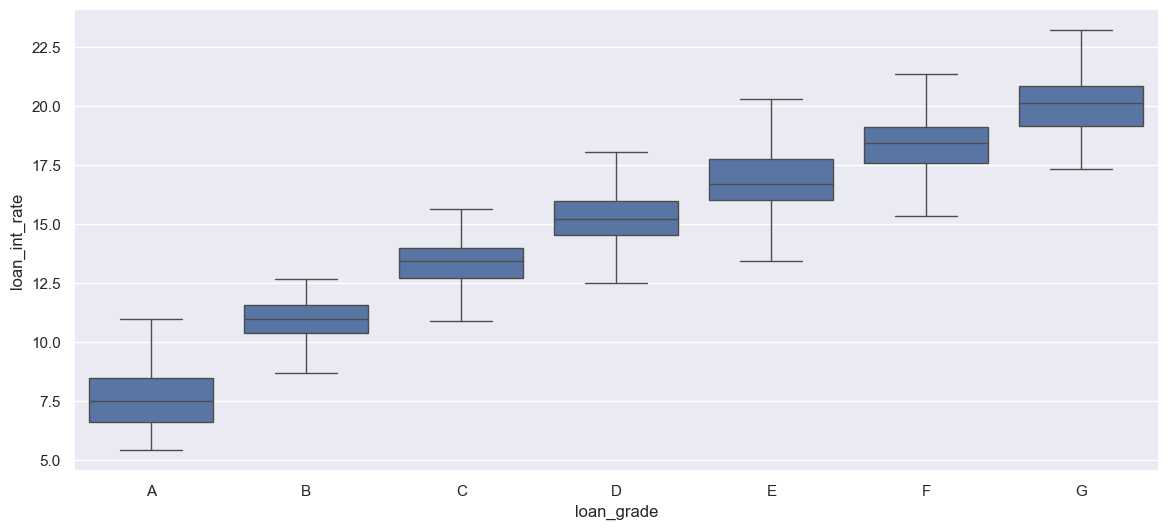

In [113]:
# Construisons le m^me graphique sans les outliers pour voir si on a la m^me tendance:
sns.set(rc={"figure.figsize":(14, 6)})
sns.boxplot(x = "loan_grade",
              y = "loan_int_rate",
              data=data,
              showfliers=False,
             order=crédit_grade)

#### le 10/06/2024

Text(0.5, 1.0, 'Carte des corrélations')

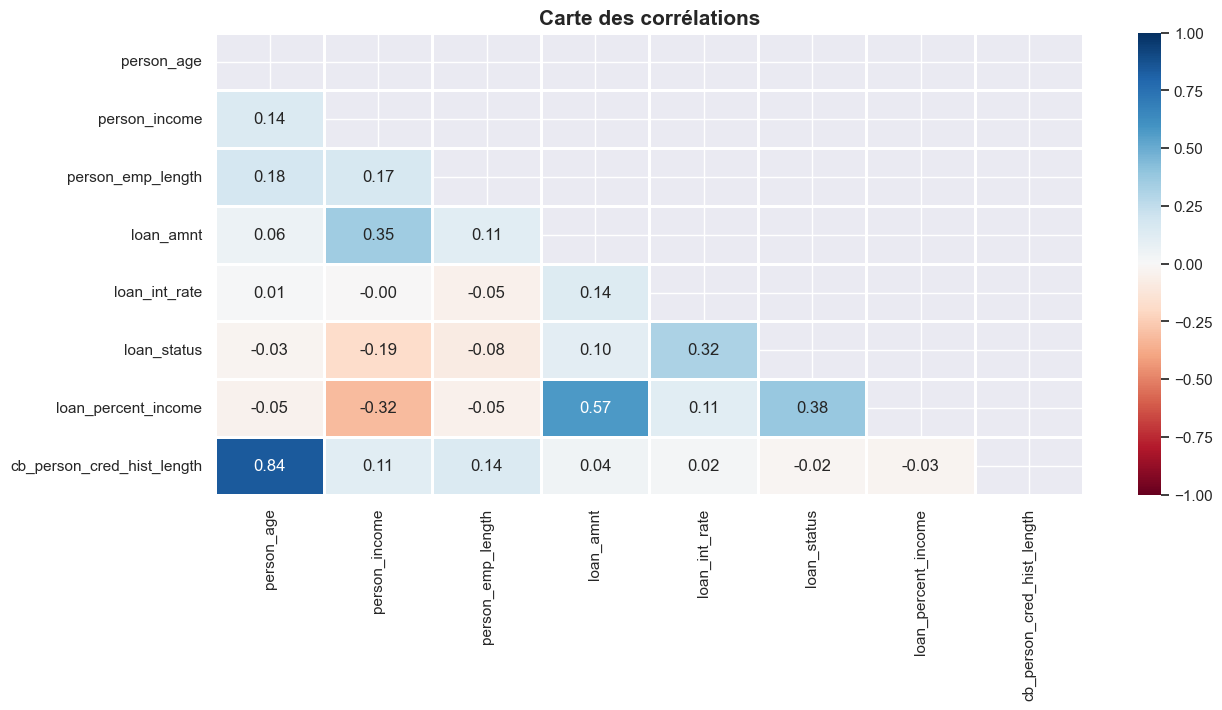

In [114]:
# Création du masque pour la matrice de corrélation
mask = np.triu(np.ones_like(data.select_dtypes(exclude='object').corr(), dtype=bool))
# Création de la carte des corrélations
sns.heatmap(data.select_dtypes(exclude= "object").corr(),
           mask= mask,
           center = 0,
           cmap = "RdBu",
           linewidths = 1,
           annot=True,
            fmt=".2f",
            vmin=-1,
            vmax=1)
# Ajout du titre
plt.title('Carte des corrélations', fontsize=15, fontweight='bold')

# Affichage de la carte

# NETTOYAGE DES DONNEES

Lors de l'analyse exploratoire des données, nous avons remarqué la présence d'outliers. Ces valeurs aberrantes peuvent affecter la qualité d'un modèle de Machine Learning. Nous allons donc les retirer des données.


Avant de retirer les outliers, il faut d'abord les détecter. L'analyse exploratoire nous a permis de savoir que cette banque avait par exemple des client(e)s de plus de 100 ans, même de plus de 140 ans. Nous pouvons utiliser le 'bon sens' pour dire qu'il est très peu probable qu'une personne qui demande un crédit ait plus de 100 ans. Ainsi on supprimerait toutes les lignes où la variable person age a des valeurs supérieures à 100.


Il existe aussi des méthodes statistiques, plus ou moins rigoureuses, pour détecter les outliers.
Nous utiliserons l'une de ces méthodes à savoir l'inter-quartile.


#### METHODE DE DETECTION DES VALEURS ABERRANTES BASEE SUR L'INTER-QUARTILE (IQR).

Selon cette méthode, une valeur est aberrante si elle est inférieure à Q1-1.5IQR ou supérieure à Q3+1.51QR. A partir de cette définition, créons une définition de détection des outliers :

In [118]:
import numpy as np
import pandas as pd

def detection_outliers_by_iqr(y):
    Q1 = np.quantile(y, 0.25)  # Enlever la virgule
    Q3 = np.quantile(y, 0.75)  # Enlever la virgule
    iqr = Q3 - Q1
    borne_inf = Q1 - iqr * 1.5
    borne_sup = Q3 + iqr * 1.5
    return np.where((y > borne_sup) | (y < borne_inf))[0]

In [119]:
# Chargement des données
file_path = "E:/DSTI/Cours/Machine_Learning_Python_Lab/ML_Livre_JA/data_credit.txt"  # Remplacez par le chemin de votre fichier CSV
data = pd.read_csv(file_path)

# Application de la fonction detection_outliers_by_iqr()
indices_outliers_age = detection_outliers_by_iqr(data["person_age"])

# Afficher les valeurs des outliers
outliers_age = data["person_age"].iloc[indices_outliers_age]
print("Valeurs des outliers :")
print(outliers_age)

# Supprimer les outliers du DataFrame
data.drop(indices_outliers_age, inplace=True)

# Vérifier les dimensions du DataFrame après suppression des outliers
print("Dimensions du DataFrame après suppression des outliers :", data.shape)

Valeurs des outliers :
81       144
183      144
575      123
747      123
29121     50
        ... 
32576     57
32577     54
32578     65
32579     56
32580     66
Name: person_age, Length: 1494, dtype: int64
Dimensions du DataFrame après suppression des outliers : (31087, 12)


In [120]:
data.shape

(31087, 12)

In [121]:
# 32581 initial rows
# 31087 rows
# Outliers 1494

En supprimant les valeurs outliers, l'ensemble de données est passé de 32580 à 31087 observations

In [122]:
data.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              861
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 2953
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

Il exite deux (2) technique principale pour traiter les valeurs manquantes

• Suppression des lignes contenant les valeurs manquantes (à seulement envisager lorsque les valeurs manquantes font moins de 5% des données) ;

•Remplacement des valeurs manquantes en faisant des imputations par la moyenne, la médiane, ...etc de la variable contenant ces valeurs manquantes. Il existe également
plus proches voisins (KNN).
d'autres méthodes d'imputation plus ou moins sophistiquées comme la méthode des k


Dans la pratique, il est conseillé de choisir une méthode puis de construire et d'évaluer le modele. Puis de changer la méthode d'imputation et reconstruit le modèle ainsi de suite afin de finalement choisir une méthode qui donne les meilleurs résultats.


Commençons par une imputation par la médiane :

In [125]:
# Imputation par la moyenne
data["person_emp_length"] = data["person_emp_length"].fillna(data["person_emp_length"].median())
data["loan_int_rate"]= data["loan_int_rate"].fillna(data["loan_int_rate"].median())

In [126]:
data.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

# TRANSFORMATION DES VARIABLES CATEGORIELLES EN VARIABLES NUMERIQUES

Dans Python, la plupart des algorithmes de Machine Learning ne fonctionnent pas directement avec les variables catégorielles. La dernière étape de préparation des données avant la modélisation sera donc consacrée à la transformation de ces variables qualitatives en variables numériques. Nous utiliserons la fonction pandas.get dummies 16 # dataframe des variables numériques

In [127]:
# dataFrame des variables numériques
vars_num = data.select_dtypes(exclude=["object"])

In [128]:
# dataFrame des variables non_numériques
vars_cat = data.select_dtypes(include= "object")

In [130]:
# Transformation des variables non_numériques
#Convert categorical variables into dummy/indicator variables without using pd.get_dummies().
vars_cat_dummies = pd.get_dummies(vars_cat)

In [132]:
# Nouvelles dataFrame
def_new = pd.concat([vars_num, vars_cat_dummies], axis=1)
print(def_new.shape)

(31087, 27)


In [133]:
def_new.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,...,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
0,22,59000,123.0,35000,16.02,1,0.59,3,False,False,...,False,False,False,False,True,False,False,False,False,True
1,21,9600,5.0,1000,11.14,0,0.10,2,False,False,...,False,False,True,False,False,False,False,False,True,False
2,25,9600,1.0,5500,12.87,1,0.57,3,True,False,...,False,False,False,True,False,False,False,False,True,False
3,23,65500,4.0,35000,15.23,1,0.53,2,False,False,...,False,False,False,True,False,False,False,False,True,False
4,24,54400,8.0,35000,14.27,1,0.55,4,False,False,...,False,False,False,True,False,False,False,False,False,True


L'opération de transformation des variables qualitatives en variables numérique a porté à 27 le nombre de variables.

# MODELISATION

Nous voulons construire un modale de Machine Learing capable de prédire si une personne sera en défaut de paiement (1) ou non (0) en fonction de certaines variables. Il s'agit donc d'un problème de Classification.

Commençons par scinder la dataframe en données d'entraînement (train data) et en données d'évaluation (test data) du modèle :

In [136]:
# Train / test data
X1 = def_new.drop("loan_status", axis=1)   # 26
Y1 = def_new["loan_status"]                # 1

In [137]:
seed = 123


seed = 123 est une commande utilisée pour initialiser la graine aléatoire dans le contexte de génération de nombres aléatoires. La graine aléatoire est un nombre utilisé comme point de départ pour générer une séquence de nombres pseudo-aléatoires. En fixant la graine aléatoire à une valeur spécifique, comme 123 dans ce cas, cela garantit que les résultats de la génération de nombres aléatoires seront les mêmes à chaque exécution du code, ce qui est utile pour obtenir des résultats reproductibles dans des expériences ou des analyses.

In [140]:
X_train, X_test, Y_train, Y_test = train_test_split(X1, Y1, 
                                                    stratify= Y1,
                                                   test_size= 0.3,
                                                   random_state= seed)

In [141]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(21760, 26)
(9327, 26)
(21760,)
(9327,)


Dans la fonction train test splito :

• L'argument stratify - y est très important surtout quand on a un déséquilibre de classe dans les données. Il permet de créer des données d'entraînement et des données de test ayant les mêmes proportions d'étiquettes de classe que l'ensemble de données originel ;

• test size = 0.3 veut dire que 30% des données serviront à évaluer le modèle et donc que 70% des données serviront à entraîner l'algorithme;

• random state est défini afin de s'assurer de la reproductibilité de l'opération. En effet, en définissant l'argument random _state, on est assuré qu'à chaque fois que le code sera exécuté, ce seront les mêmes données d'entraînement et de test qui seront générées.

Construisons d'abord un modèle de base avec l'algorithme des forêts aléatoires
(RandomForestClassifier) :

In [144]:
from sklearn.ensemble import RandomForestClassifier

La ligne de code from sklearn.ensemble import RandomForestClassifier est utilisée pour importer la classe RandomForestClassifier de la bibliothèque scikit-learn (sklearn). 

Cette classe est un algorithme de machine learning basé sur des forêts aléatoires (Random Forests), qui est couramment utilisé pour des tâches de classification et de régression

Le RandomForestClassifier est un modèle de machine learning qui utilise de nombreux arbres de décision pour prédire des catégories. Chaque arbre de décision vote pour une catégorie, et la catégorie avec le plus de votes est la prédiction finale.

In [145]:
# Création du modèle
rf = RandomForestClassifier(random_state = seed)

La méthode rf.fit(X_train, y_train) est utilisée pour entraîner le modèle de forêt aléatoire sur les données d'entraînement. Voici une explication détaillée de ce que fait cette ligne de code :

rf : C'est l'instance du modèle RandomForestClassifier que vous avez créé précédemment avec rf = RandomForestClassifier(random_state=seed).

fit : C'est une méthode de l'instance RandomForestClassifier qui entraîne le modèle en ajustant ses paramètres internes sur les données fournies

In [146]:
# Entraînement du modèle
rf.fit(X_train, Y_train)

RandomForestClassifier(random_state=123)

#### EVALUATION DES PERFORMANCES DU MODELE

L'évaluation de la performance d'un modèle est une tâche qu'il faut effectuer avec soin. Il existe plusieurs métriques permettant d'évaluer cette performance. Le choix de la métrique doit être faite rigoureusement en fonction du problème business qu'on veut résoudre.

Commençons d'abord par calculer la précision globale du modèle de forêts aléatoires.

In [147]:
# Précision globale du modèle
print("Le score sur les données d'entrainement est :", rf.score(X_train, Y_train))

print("Le score sur les données d'évaluation est :", rf.score(X_test, Y_test))

Le score sur les données d'entrainement est : 0.9999540441176471
Le score sur les données d'évaluation est : 0.9357778492548515


Ces valeurs nous indiquent que pratiquement 100% des statuts de prêts ont été correctement prédits au niveau des données d'entraînement et qu'environ 94% des statuts de prêts ont été correctement prédits au niveau des données de test. Cet écart entre score d'entraînement et score de test indique qu'il y a peut-être un problème de surapprentissage (overfiting).


Une autre fonction utilisée pour évaluer les modèles de classification est la fonction classification report. Cette fonction permet de générer d'un seul coup plusieurs métriques.

In [148]:
from sklearn.metrics import classification_report

In [149]:
# Prédictions sur le test data
Y_pred = rf.predict(X_test)

# Rapport de classification
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      7290
           1       0.97      0.73      0.83      2037

    accuracy                           0.94      9327
   macro avg       0.95      0.86      0.90      9327
weighted avg       0.94      0.94      0.93      9327



1______Deux métriques sont vraiment utiles dans le rapport de classification : precision et recall.

Le recall des prêts en défaut de paiement est égal à 0,73 ce qui signifie que 73% des véritables prêts en défaut de paiement ont été correctement prédits donc 27% des véritables prêts en défaut de paiement ont été mal prédits par le modèle comme étant des prêts qui ne sont pas en défaut de paiement. Ceci constitue un grand risque de perte d'argent pour la banque.

Imaginons que la banque ait 10000 prêts et que le montant de chaque prêt est 3000 Euros. Si tous ces 10000 prêts étaient en défaut de paiement, la perte d'argent serait estimée à 10000 x 0.27 x 3000 soit 8 100 000 Euros. C'est une grosse perte d'argent pour la banque. Bien que le modèle donne une précision globale d'environ 94%, la banque perdrait énormément d'argent si elle implémentait ce modèle dans son système de crédit.

En revanche, le modèle prédit bien les prêts qui ne sont pas en défaut paiement. 99% des véritables prêts qui ne sont pas en défaut de paiement ont été correctement prédits donc seulement 1% ont été mal prédits par le modèle comme étant des prêts en défaut de paiement.
Ceci constitue un petit risque de perte d'opportunité d'affaires pour la banque.

Notre modèle a deux problèmes majeurs : overfiting et mauvaise prédiction des prêts en défaut de paiement. Ce dernier problème est certainement dû au déséquilibre de classe observé dans l'analyse exploratoire des données.
Il peut être très difficile de jongler entre la précision et le recall lorsqu'on tente d'augmenter la performance d'un modèle de classification. Heureusement, il existe une métrique qui combine les deux : F1-Score'
Dans la suite, nous essayerons d'améliorer la performance de notre modèle en cherchant à augmenter le F1-Score des défauts de paiement.

#### DETERMINATION DE L'IMPORTANCE DES PREDICTEURS

Nous allons exploiter quand même le modèle de forêts aléatoires afin de déterminer l'importance de chaque variable indépendante dans la prédiction du statut de prêt.

In [156]:
# Importance des variables
vars_imp = pd.Series(rf.feature_importances_,
                    index= X1.columns).sort_values(ascending = False)

In [158]:
vars_imp

loan_percent_income               0.227448
person_income                     0.143809
loan_int_rate                     0.109570
loan_amnt                         0.076076
person_emp_length                 0.060354
person_home_ownership_RENT        0.050525
loan_grade_D                      0.048754
person_age                        0.044365
cb_person_cred_hist_length        0.034412
person_home_ownership_MORTGAGE    0.028716
loan_intent_DEBTCONSOLIDATION     0.023212
loan_intent_MEDICAL               0.022241
loan_grade_C                      0.019900
person_home_ownership_OWN         0.018639
loan_intent_HOMEIMPROVEMENT       0.014150
loan_grade_E                      0.011795
loan_grade_A                      0.010900
loan_intent_EDUCATION             0.010697
loan_intent_PERSONAL              0.008946
loan_intent_VENTURE               0.008513
cb_person_default_on_file_N       0.007469
cb_person_default_on_file_Y       0.006634
loan_grade_B                      0.005134
loan_grade_

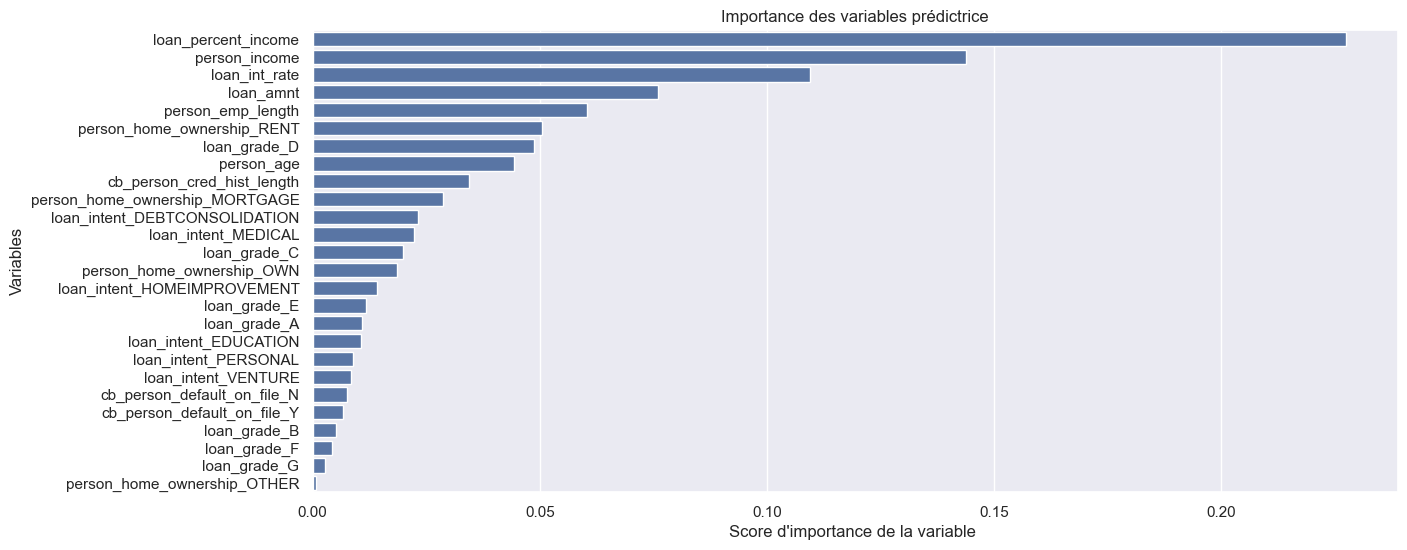

In [159]:
# Visualisation des variables importantes 
sns.barplot(x = vars_imp,
           y = vars_imp.index)
plt.xlabel("Score d'importance de la variable ")
plt.ylabel("Variables")
plt.title("Importance des variables prédictrice")
plt.show()

#### (RE)CONSTRUCTION D4UN MODELE DE FORETS ALEATOIRES

Remodélisons les données en ne considérant cette fois-ci que les variables dont le score d'importance est supérieur à 0,010.

In [161]:
# variables dont le score d'importance est supérieur à 0,010 ( Essayez plusieurs seuils et regardez les valeurs des métriques
vars_selected = vars_imp[vars_imp > 0.010].index.to_list()
vars_selected

['loan_percent_income',
 'person_income',
 'loan_int_rate',
 'loan_amnt',
 'person_emp_length',
 'person_home_ownership_RENT',
 'loan_grade_D',
 'person_age',
 'cb_person_cred_hist_length',
 'person_home_ownership_MORTGAGE',
 'loan_intent_DEBTCONSOLIDATION',
 'loan_intent_MEDICAL',
 'loan_grade_C',
 'person_home_ownership_OWN',
 'loan_intent_HOMEIMPROVEMENT',
 'loan_grade_E',
 'loan_grade_A',
 'loan_intent_EDUCATION']

In [162]:
# Nouvelle division des données
x_train, x_test, y_train, y_test = train_test_split(X1[vars_selected], 
                                                    Y1, 
                                                    #stratify = Y, 
                                                    test_size = 0.3, 
                                                    random_state = seed)

In [163]:
print(x_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(21760, 18)
(9327, 26)
(21760,)
(9327,)


In [164]:
# 1er modelisation
#(21760, 26)
#(9327, 26)
#(21760,)
#(9327,)

In [165]:
# Création du modèle
rf2 = RandomForestClassifier(random_state = seed)

In [166]:
# Entrainement du modèle
rf2.fit(x_train, y_train)

RandomForestClassifier(random_state=123)

In [167]:
# Prédictions
y_pred2 = rf2.predict(x_test)

In [168]:
# Rapport de classification 

print(classification_report(y_test, 
                           y_pred2))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      7247
           1       0.97      0.72      0.83      2080

    accuracy                           0.93      9327
   macro avg       0.95      0.86      0.89      9327
weighted avg       0.94      0.93      0.93      9327



Data pour le première modélisation  
#_____________                 precision    recall  f1-score   support

           0       0.93      0.99      0.96      7290
           1       0.97      0.73      0.83      2037

    accuracy                           0.94      9327
   macro avg       0.95      0.86      0.90      9327
weighted avg       0.94      0.94      0.93      9327


En ne sélectionnant que les variables indépendantes dont le score d'importance est supérieur à 0,010, les performances du modèle (voir rapport de classification ci-dessus) n'ont pas été amélioré. Cette opération nous a quand même permise de réduire la complexité du modèle car nous sommes passés de 26 à 18 variables indépendantes tout en gardant les mêmes performances qu'avec le premier modèle.

Dans ce qui suit, nous appliquerons la méthode de sous-échantillonnage afin de régler le problème de déséquilibre de classe.

Le sous-échantionnage régle le problème de déséquilibre.

#### METHODE DE SOUS-ECHANTILLONNAGE

Imaginons qu'on ait 100 prêts dont 20 sont en défaut de paiement et 80 ne le sont pas. La méthode de sous-échantillonnage consiste à échantillonner de façon aléatoire 20 prêts non-défauts et à les combiner avec les 20 prêts défauts de paiement pour former un ensemble de données équilibré.

In [186]:
# Concaténation de X_train, y train et reinitialisation
# reset = metttre à jour/réinitialiser

df_train = pd.concat([X_train.reset_index(drop=True),
                      y_train.reset_index(drop=True)],
                     axis=1)

In [187]:
df_train

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,...,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y,loan_status
0,22,50004,6.0,2500,12.53,0.05,2,True,False,False,...,False,False,True,False,False,False,False,True,False,0
1,29,52884,3.0,5600,11.99,0.11,10,False,False,False,...,False,True,False,False,False,False,False,True,False,0
2,23,46800,7.0,9000,10.99,0.19,4,False,False,True,...,False,False,True,False,False,False,False,True,False,0
3,21,48000,5.0,7350,10.65,0.15,2,True,False,False,...,False,True,False,False,False,False,False,True,False,0
4,39,18300,0.0,1200,14.74,0.07,11,False,False,False,...,False,False,False,True,False,False,False,False,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21755,35,37000,5.0,14000,7.88,0.38,8,False,False,False,...,True,False,False,False,False,False,False,True,False,1
21756,31,72000,15.0,12300,14.96,0.17,5,True,False,False,...,False,False,False,True,False,False,False,False,True,0
21757,37,42000,0.0,20000,14.25,0.48,17,False,False,False,...,False,False,False,False,True,False,False,False,True,1
21758,25,33000,3.0,10000,7.51,0.30,4,False,False,False,...,True,False,False,False,False,False,False,True,False,0


In [188]:
df_train.shape

(21760, 27)

In [172]:
# Nombre de prêts dans chaque classe

n_nondefauts, n_defauts = df_train["loan_status"].value_counts()

In [189]:
# dataFrame des prêts en défaut et dataFrame des prêts en non défauts

defauts_df = df_train[df_train["loan_status"] == 1]
nondefauts_df = df_train[df_train["loan_status"] == 0]

In [190]:
# Sous-échantillonnage de non défauts pour qu'ils soient en même nombre que le défauts
nondefauts_df2 = nondefauts_df.sample(n_defauts)

In [191]:
# Concaténation
df_train2 = pd.concat([nondefauts_df2.reset_index(drop= True),
            defauts_df.reset_index(drop= True)],
            axis = 0)

In [192]:
df_train2

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,...,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y,loan_status
0,23,69935,2.0,7200,7.49,0.10,3,True,False,False,...,True,False,False,False,False,False,False,True,False,0
1,37,29808,4.0,7750,10.99,0.26,17,False,False,False,...,False,False,True,False,False,False,False,False,True,0
2,24,103000,8.0,21000,13.49,0.20,3,True,False,False,...,False,False,True,False,False,False,False,False,True,0
3,22,52000,2.0,25000,11.11,0.48,4,False,False,False,...,False,True,False,False,False,False,False,True,False,0
4,37,61260,6.0,4000,14.82,0.07,12,False,False,False,...,False,False,True,False,False,False,False,False,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4704,24,75000,0.0,4975,6.76,0.07,4,False,False,False,...,True,False,False,False,False,False,False,True,False,1
4705,25,123144,2.0,12000,10.75,0.10,2,False,False,False,...,False,True,False,False,False,False,False,True,False,1
4706,35,37000,5.0,14000,7.88,0.38,8,False,False,False,...,True,False,False,False,False,False,False,True,False,1
4707,37,42000,0.0,20000,14.25,0.48,17,False,False,False,...,False,False,False,False,True,False,False,False,True,1


In [193]:
df_train2.shape

(9418, 27)

In [194]:
# Vérification du nombre de prêts de chaque classe
df_train2["loan_status"].value_counts()

loan_status
0    4709
1    4709
Name: count, dtype: int64

In [195]:
X2 = df_train2.drop("loan_status", axis=1)
Y2 = df_train2["loan_status"]

Construisons maintenant un modèle de forêt aléaroires suer ce nouvel ensemble de données sous-echantillionnées

In [196]:
# Data separtion
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2,
                                                       Y2,
                                                       test_size = 0.3,
                                                       random_state= seed)

In [197]:
# Création du modèle
rf3 = RandomForestClassifier(random_state = seed)

In [198]:
# Entraînement du modèle
rf3.fit(X2_train,
        Y2_train)

RandomForestClassifier(random_state=123)

In [199]:
# Prédictions
Y2_pred3 = rf3.predict(X2_test)

In [200]:
# Rapport de classification
print(classification_report(Y2_test, Y2_pred3))

              precision    recall  f1-score   support

           0       0.51      0.51      0.51      1422
           1       0.50      0.49      0.50      1404

    accuracy                           0.50      2826
   macro avg       0.50      0.50      0.50      2826
weighted avg       0.50      0.50      0.50      2826



Ce rapport de classification indique le modèle if3 prédit les défauts de paiement de manière beaucoup plus précise que les précédents modèles. En effet, 78% des prêts en défauts de paiement ont été correctement prédit contre 73% pour les deux modèles précédents.


#### CONCLUSION

Dans ce projet, nous avons traité un problème de classification. De plus, ce projet nous a permis d'ajouter plusieurs techniques utiles à notre boîte à outils de Machine Learning. Notre objectif était de construire un modèle qui prédit si le débiteur d'une banque sera en défaut de paiement ou pas. Un tel modèle est une véritable aide à la décision et permet aux banques de mieux gérer le risque de crédit.

Comment rechercher les hyperparamètres optimaux d'un modèle ? Ce sera l'objet principal du prochain projet.